#1. Introduction to interest rates

Simple interest rate versus
compounding interest rate

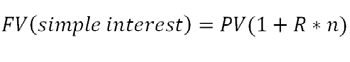

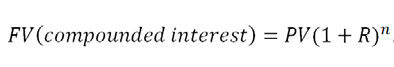

In [ ]:
import numpy as np

In [ ]:
n=10 #the number of periods
t=np.linspace(0,n)
for i in t:
  print(i)


0.0
0.20408163265306123
0.40816326530612246
0.6122448979591837
0.8163265306122449
1.0204081632653061
1.2244897959183674
1.4285714285714286
1.6326530612244898
1.836734693877551
2.0408163265306123
2.2448979591836737
2.4489795918367347
2.6530612244897958
2.857142857142857
3.0612244897959187
3.2653061224489797
3.4693877551020407
3.673469387755102
3.8775510204081636
4.081632653061225
4.285714285714286
4.4897959183673475
4.6938775510204085
4.8979591836734695
5.1020408163265305
5.3061224489795915
5.510204081632653
5.714285714285714
5.918367346938775
6.122448979591837
6.326530612244898
6.530612244897959
6.73469387755102
6.938775510204081
7.142857142857143
7.346938775510204
7.551020408163265
7.755102040816327
7.959183673469388
8.16326530612245
8.36734693877551
8.571428571428571
8.775510204081632
8.979591836734695
9.183673469387756
9.387755102040817
9.591836734693878
9.795918367346939
10.0


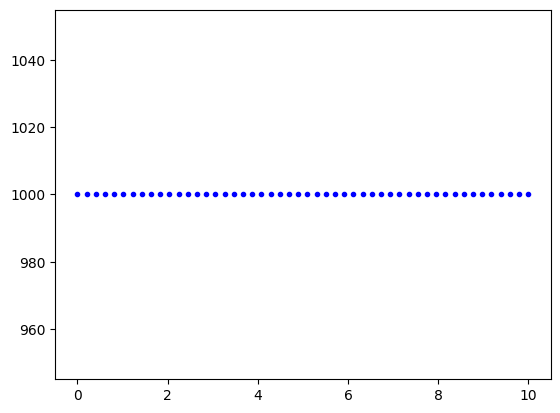

In [ ]:
import matplotlib.pyplot as plt
pv=1000
y1=np.ones(len(t))*pv
plt.plot(t, y1, 'b.', label="no interest")
plt.show()

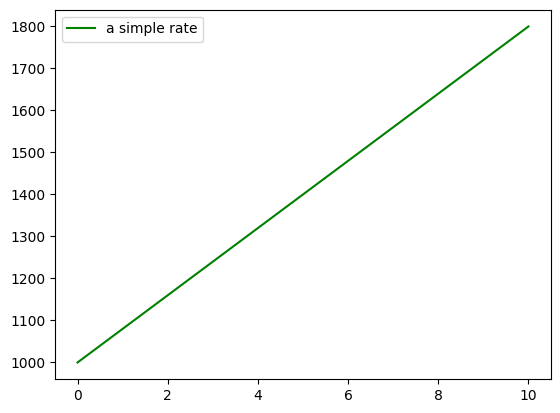

In [ ]:
r=0.08 #the period rate
y2=pv*(1+r*t)  #fv from a simple rate
plt.plot(t, y2, 'g-', label="a simple rate")
plt.legend(loc="upper left")
plt.show()

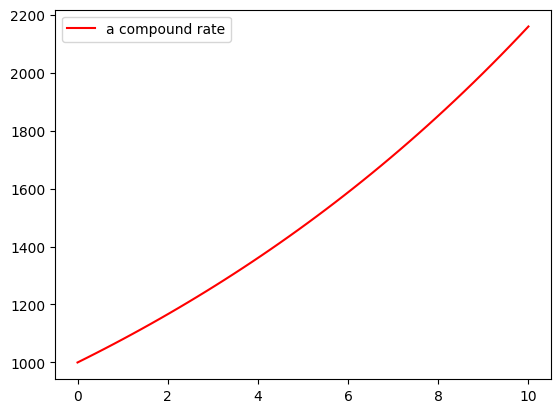

In [ ]:
## make a plot of fv from a compounded rate
r=0.08 #the period rate
y3=pv*(1+r)**t  #fv from a simple rate
plt.plot(t, y3, 'r-', label="a compound rate")
plt.legend(loc="upper left")
plt.show()


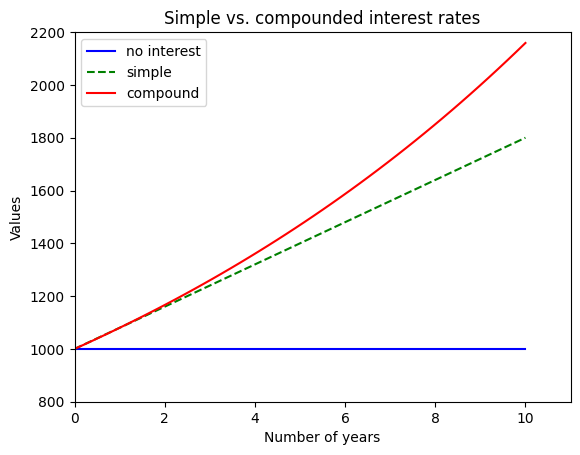

In [ ]:
import matplotlib.pyplot as plt

pv=1000 #the present value
r=0.08 #the period rate
n=10 #the number of periods
t=np.linspace(0,n) #period interval, t=0, 1,...,n
y1=np.ones(len(t))*pv # a horizontal line (number of years)
y2=pv*(1+r*t)  #fv from a simple rate
y3=pv*(1+r)**t #fv from a compounding rate
plt.title('Simple vs. compounded interest rates')
plt.xlabel('Number of years')
plt.ylabel('Values')
plt.xlim(0,11) # x-axis scale
plt.ylim(800,2200) #y-axis scale
plt.plot(t, y1, 'b-', label="no interest")
plt.plot(t, y2, 'g--', label="simple")
plt.plot(t, y3, 'r-', label="compound")
plt.legend(loc="upper left")
plt.show()

The numpy-financial package contains a collection of elementary financial functions.



In [ ]:
pip install numpy_financial

**Example**

John Doe intends to buy a house in Buffalo, New York, with a price tag of $240,000. He plans to pay 20% of the price of the house as a down payment and borrow the rest from M&T Bank. For a 30-year mortgage, the bank offers an annual rate of 4.25%. How much is his monthly
mortgage payment?

We will use numpy_financial.pmt() to compute the payment.

Detail of the function is at https://numpy.org/numpy-financial/latest/pmt.html



In [ ]:
import numpy_financial as npf
pv = 240000*0.8
apr = 0.045 # Annual percentage rate
m = 12 # A compounding frequency
years = 30
npf.pmt(apr/m, years*m, pv)


-972.8357948657007

**Question**

What is the bi-annual payment needed to pay off a $200,000 loan in 15 years at an annual interest rate of 7.5%?

In [ ]:
## Enter your code here
import numpy_financial as npf
pv = 200000
apr = 0.075 # Annual percentage rate
m = 2 # A compounding frequency
years = 15
npf.pmt(apr/m, years*m, pv)

-11217.524830778257

**Question (Optional)**

Ann Taylor intends to buy a house in Buffalo, New York, with a price tag of $420,000. She plans to pay 10% of the price of the house as a down payment and borrow the rest from M&T Bank. For a 20-year mortgage, the bank offers an annual rate of 5.50%. How much is her bi-annual mortgage payment?

In [ ]:
## Enter your code here
import numpy_financial as npf
pv = 200000
down_pmt = pv - 0.1*pv
apr = 0.055 # Annual percentage rate
m = 2 # A compounding frequency
years = 20
npf.pmt(apr/m, years*m, pv-down_pmt)

#2. Conversion between various effective rates, APR

To compare two rates with different compounding frequencies, we have to convert
them into the same rates before we could compare. One such effective rate is called
Effective Annual Rate (EAR). For a given APR (Annual Percentage Rate or Nominal Rate) with a compounding frequency of m,
its EAR is calculated here:

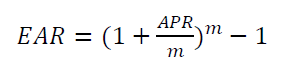


APR / m = Periodic rate

**Method 1**: Convert two rates into the same rate using Effective Annual Rate (EAR)

In [ ]:
def EAR(APR, m): # m is a compounding frequency
    ear = (1+APR/m)**m-1
    return ear

In [ ]:
APR1 = 0.08
m1 = 2 # a compounding frequency
EAR1 = EAR(APR1, m1)

APR2 = 0.079
m2 = 4
EAR2 = EAR(APR2, m2)

print(EAR1, EAR2)

0.08160000000000012 0.08137134208625363


**Method 2**: Convert one APR to APR

Alternatively, we could apply certain formula directly. Here, we show how to derive
a formula: from APR1 (with m1 componding frequency) to APR2(with m2 componding frequency) . For formula between two annual rates of APR1and APR2 is given here:

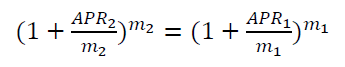

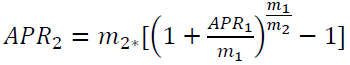

APR2 เป็น norminal rate ที่เท่ากับ effective rate 1 และมีการทบต้น m2 ครั้งต่อปี

In [ ]:
#APR1: annual percentage rate
#m1: compounding frequency for APR1
#m2: effective period rate of our target effective rate
def APR2APR(APR1,m1,m2):
    apr2 = m2*((1+APR1/m1)**(m1/m2)-1)
    return apr2

In [ ]:
APR1 = 0.08
m1 = 2 #compounding frequency

APR2 = 0.079
m2 = 4

#What is the APR with m2 compounding frequency for APR1
APR1_2 = APR2APR(APR1,m1,m2)
print(APR1_2)


0.07921561087422813


**Convert APR to a continuously compounded rate (ทบต้นต่อเนื่อง)**


We have the following formula to calculate the
future value for a given present value:
ทบต้นปีละ 1 ครั้ง

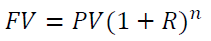

Another way to calculate the future value of one present
value is using a continuously compounded rate, $R_c$. Its formula is given here:
ทบต้นแบบต่อเนื่อง

Rc = norminal rate (c = continuous)

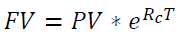

Equaling the preceding two equations would lead to the following one:

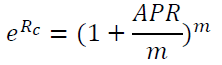

Then solve the preceding equation for Rc.
Finally, for a given APR and m (compounding frequency), we have the following
formula to estimate $R_c$:

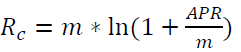

In [ ]:
def APR2Rc(APR,m):
    rc = m*np.log(1+APR/m) #np.log() returns natural log.
    return rc

Assume that the APR is 2.34% compounded semi-annually. What is its equivalent Rc?

In [ ]:
APR2Rc(APR=0.0234,m=2)

0.023264168459415393

**Question**

Assume that the APR is 12% compounded monthly. What is its equivalent Rc?

In [ ]:
##Enter your code here
APR2Rc(APR=0.12,m=12)

0.1194039702380171

**Exercise 1**

Create a function to convert APR to Rm (Periodic Rate = APR2/m2).

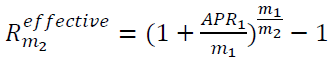


Test your code with this example. A bank offers 10% annual rate compounding semi-annually. What is its equivalent effective quarterly rate?  

equivalent effective quarterly rate = Periodic rate ของการทบต้นแบบ 4 ครั้ง (quarterly)

R Periodic m2

In [ ]:
## Define your function here
def APR2Rm(APR1,m1,m2):
    rm = ((1 + APR1/m1)**(m1/m2))-1
    return rm

In [ ]:
## Test your function
APR1 = 0.1
m1 = 2
m2 = 4
## Expected result = 0.02469507659595993
APR2Rm(APR1,m1,m2)

0.02469507659595993

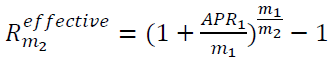

เทียบกับสมการ

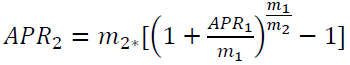

In [ ]:
APR2 = 0.02469507659595993*4 # R periodic rate * quartery
print(APR2)
print(APR2APR(APR1,m1,m2))

0.09878030638383972
0.09878030638383972


# 3.Term structure of interest rates


*   The term structure of interest rates is defined as the relationship between risk-free
rate/yield (ผลตอบแทน) and time (อายุการกู้ยืม).

*   A risk-free rate is usually defined as the default-free treasury rate.




For example, on 12/21/2016, from Yahoo!Finance at http://finance.yahoo.com/ bonds, we could get the following information.

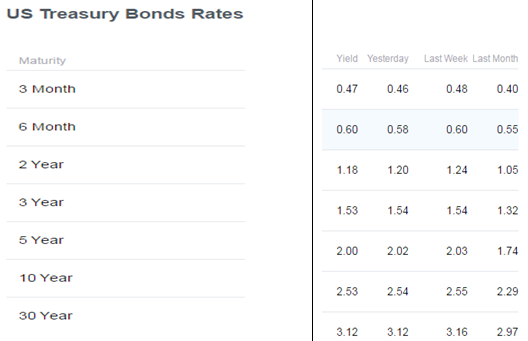

Based on the information supplied by the preceding image, we have the following
code to draw a so-called **yield curve**:

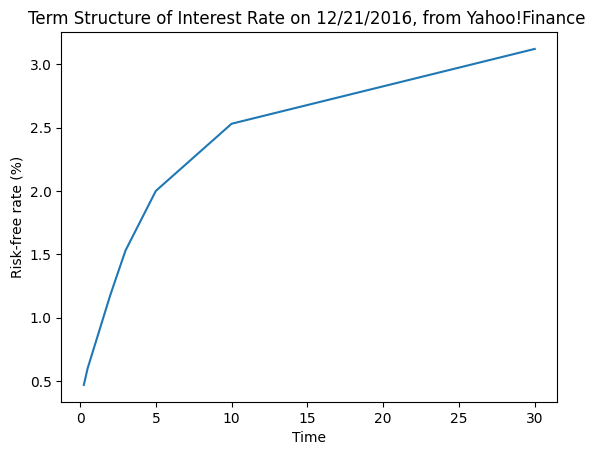

In [ ]:
time=[3/12,6/12,2,3,5,10,30] # Maturity
rate=[0.47,0.6,1.18,1.53,2,2.53,3.12] # Yield
plt.title("Term Structure of Interest Rate on 12/21/2016, from Yahoo!Finance ")
plt.xlabel("Time")
plt.ylabel("Risk-free rate (%)")
plt.plot(time,rate)
plt.show()

**Interest rate interpolation (การประมาณค่าในช่วง)**

เป็นการเทียบบัญญัติไตรยางค์นำไปใช้เมื่อต้องการไม่มีพันธบัตรตัวนั้นออกมาในตลาดจริงๆ เช่น เมื่อเราต้องการหา yield ที่ 4 ปี แล้วปกติมีแค่ 1 ปี 3 ปี 5 ปี ลักษณะนี้ก็เอา yieldปีที่ 3 + yieldปีที่ 5 หาร 2

Since the term structure of interest rates has many missing numbers, the function called .interpolate() from the pandas module could be
used to interpolate those values, see the following example where we have two
missing values between 2 and 6:

มาจาก library pandas

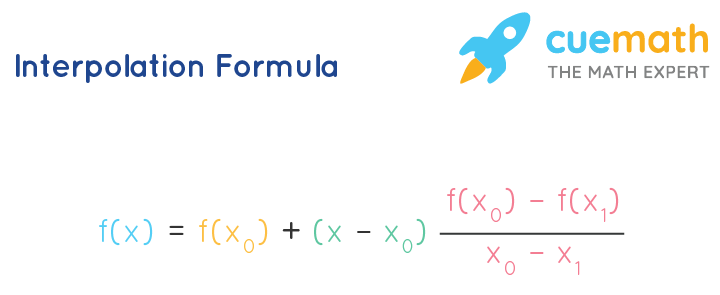

In [ ]:
import pandas as pd
#1,2,x,x,6
x=pd.Series([1,2,np.nan,np.nan, 6])
x.interpolate()

0    1.000000
1    2.000000
2    3.333333
3    4.666667
4    6.000000
dtype: float64

For the preceding example, related to the term structure of interest rates, from years
6 to 9, there is no data. We could interpolate the rates for years 6 to 9 starting from year 5 as follows.

In [ ]:
x=pd.Series([2,np.nan,np.nan,np.nan,np.nan,2.53]) #rate for year 5 = 2 and for year 10 = 2.53, we interpolate rates for year 6-9
print(x,"\n")
print(x.interpolate())

0    2.00
1     NaN
2     NaN
3     NaN
4     NaN
5    2.53
dtype: float64 

0    2.000
1    2.106
2    2.212
3    2.318
4    2.424
5    2.530
dtype: float64


**The spread**
1. The spread is the difference between YTM of a corporate bond over the risk-free rate (ส่วนต่างผลตอบแทนระหว่างพันธบัตรกับ risk-free rate). It is used to estimate the discount rate for corporate bonds.
2. The spread is a measure of the default
risk. Thus, it should be closely correlated with the credit rating of the company and
of the bond.




*What is Pickle*

https://stackoverflow.com/questions/8968884/python-serialization-why-pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#The index column is the credit rating. The values are spreads of credit ratings on year = 1,2,3,5,7,10,30/
import pandas as pd
spread=pd.read_pickle("/content/drive/MyDrive/Financial Engineering Python/data/spreadBasedOnCreditRating.pkl")
spread # pickle เป็นการแช่แข็งข้อมูล ถ้าเรา write ออกไปแบบไหน ขาเอามาใช้ก็จะหน้าตาเหมือนเดิม

,1,2,3,5,7,10,30
Rating,,,,,,,
Aaa/AAA,5.00,8.00,12.00,18.00,28.00,42.00,65.00
Aa1/AA+,10.00,18.00,25.00,34.00,42.00,54.00,77.00
Aa2/AA,14.00,29.00,38.00,50.00,57.00,65.00,89.00
Aa3/AA-,19.00,34.00,43.00,54.00,61.00,69.00,92.00
A1/A+,23.00,39.00,47.00,58.00,65.00,72.00,95.00
A2/A,24.00,39.00,49.00,61.00,69.00,77.00,103.00
A3/A-,32.00,49.00,59.00,72.00,80.00,89.00,117.00
Baa1/BBB+,38.00,61.00,75.00,92.00,103.00,115.00,151.00
Baa2/BBB,47.00,75.00,89.00,107.00,119.00,132.00,170.00


In [ ]:
spread.columns

Index(['1', '2', '3', '5', '7', '10', '30 '], dtype='object')

In [ ]:
spread.index

Index(['Aaa/AAA', 'Aa1/AA+', 'Aa2/AA', 'Aa3/AA-', 'A1/A+', 'A2/A', 'A3/A-',
       'Baa1/BBB+', 'Baa2/BBB', 'Baa3/BBB-', 'Ba1/BB+', 'Ba2/BB', 'Ba3/BB-',
       'B1/B+', 'B2/B', 'B3/B-', 'Caa/CCC+', 'US Treasury Yield'],
      dtype='object', name='Rating')

In [ ]:
spread['1']

Rating
Aaa/AAA                5.00
Aa1/AA+               10.00
Aa2/AA                14.00
Aa3/AA-               19.00
A1/A+                 23.00
A2/A                  24.00
A3/A-                 32.00
Baa1/BBB+             38.00
Baa2/BBB              47.00
Baa3/BBB-             83.00
Ba1/BB+              157.00
Ba2/BB               231.00
Ba3/BB-              305.00
B1/B+                378.00
B2/B                 452.00
B3/B-                526.00
Caa/CCC+             600.00
US Treasury Yield      0.13
Name: 1, dtype: float64

What is a discount rate (ผลตอบแทน) for BBB+ bonds of 1 years?


In [ ]:
spread['1']['Baa1/BBB+']

38.0

In [ ]:
# 1 basis point = 0.01% or 0.0001 interest rate
discount_rate = spread['1']['US Treasury Yield']+spread['1']['Aaa/AAA']/10000
discount_rate

0.1305

**Question**

What is a discount rate  for AAA bonds of 5 years?

In [ ]:
type(spread)

pandas.core.frame.DataFrame

In [ ]:
## Enter your code here
spread['5']['Aaa/AAA']
## or
spread.loc["Aaa/AAA","5"]

18.0

# 4.Bond evaluation (การหามูลค่าของพันธบัตร)

**Bond price**

Use numpy_financial.pv() to compute the present value.

Detail at https://numpy.org/numpy-financial/latest/pv.html#numpy_financial.pv

In [ ]:
import numpy_financial as npf
# Calculate the price of a 3-year coupon bond with an annual coupon rate of 8% and the $100 face value (มูลค่าที่ตราไว้)
# Assume that the effective annual rate of 2.4% (YTM).
# เป็น premium bond ทำให้ราคาพันธบัตรมากกว่าราคา par

npf.pv(rate=0.024, nper=3, pmt=0.08*100, fv=100) #nper = maturity

-116.0247325897217

By convention, the negative sign represents cash flow out

**Question**

There is a bond with a $2000 face value which will pay a coupon rate of 8% once per year. If the bond will be matured in 5 years and the annual effective rate is 6% for all loan terms, what is the price of the bond?

In [ ]:
##Enter your code here
npf.pv(rate=0.06, nper=5, pmt=0.08*2000, fv=2000) #nper = อายุพันธบัตร

-2168.494551422629

**Yield to Maturity (YTM)**

Use numpy_financial.rate() to compute the rate of interest per period

Detail at https://numpy.org/numpy-financial/latest/rate.html#numpy_financial.rate


In [ ]:
#Assume that we bought a bond for $818 today. It has a maturity term of 5 years.
#The coupon rate is 3% and coupon payments are annual.
#If the face value is $1,000, what is the YTM?
npf.rate(nper=5, pmt=0.03*1000, pv=-818, fv=1000)

0.07498180431487073

**Exercise 2**

Assume that we bought a zero-coupon bond for \$717.25. The face value of the bond is $1,000  and it would mature in 10 years. What is its YTM?

Expected Result = 0.03379146977122812

In [ ]:
## Write your code here
npf.rate(nper=10, pmt=0, pv=-717.25, fv=1000)

0.03379146977122812

**Bond duration  (อายุเฉลี่ยของพันธบัตร)**

We have a 15-year zero coupon bond with a face value of
$100 and a coupon bond of 30years. The coupon rate is 9% with an annual coupon payment. If the current yield jumps from 4% to 5%, Which bond is riskier?



*Modified duration*

The modified duration of a bond can be thought of as the first derivative of the relationship between price and yield:

 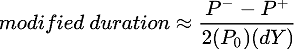

$P^-$  is the price of the bond from a decrease in yield by dY

$P^+$ is the price of the bond from a increase in yield by dY

$P_0$ is the initial price of the bond

$dY$ is the given change in yield




In [ ]:
def durationBond(d_rate, d_nper,d_couponrate, d_fv=100):
  #d_rate = bond yield
  #d_nper = duration
  #d_couponrate = coupon rate
  #d_fv = face value

  pv_down = npf.pv(rate=d_rate-0.01,nper=d_nper, pmt=d_couponrate*d_fv, fv=d_fv)
  pv_up = npf.pv(rate=d_rate+0.01,nper=d_nper, pmt=d_couponrate*d_fv, fv=d_fv)
  pv = npf.pv(rate=d_rate,nper=d_nper, pmt=d_couponrate*d_fv, fv=d_fv)
  duration = (pv_down - pv_up) / (2 * pv * 0.01)
  return duration

In [ ]:
# a duration of a coupon bond of 30 years with 9% coupon rate, 4% yield and a face value of $100
d_rate = 0.04
d_nper = 30
d_crate = 0.09
print(durationBond(d_rate, d_nper,d_crate))

15.046871683525906


In [ ]:
# a duration of a 15-year zero coupon bond with 4% yield
d_rate = 0.04
d_nper = 15
d_crate = 0
print(durationBond(d_rate, d_nper,d_crate))

14.483624337571221


**Exercise 3**

Which of the bonds from the options below will be the riskiest.

1. A 20 year zero coupon bond with a 2% yield.

2. A 10 year bond with a 3% annual coupon and 4% yield.

3. A 20 year zero coupon bond with a 3% yield.
4. A 10 year bond with a 5% annual coupon and 4% yield.




In [ ]:
## Write your code here
bond = {
    "bond_name": ["A", "B", "C", "D"],
    "d_rate": [0.02, 0.04, 0.03, 0.04],
    "d_nper": [20, 10, 20, 10],
    "d_crate": [0, 0.03, 0, 0.05]
}

# Create Dataframe and create duration column
df_bond_duration = pd.DataFrame(bond)
df_bond_duration["duration"] = durationBond(df_bond_duration["d_rate"], df_bond_duration["d_nper"], df_bond_duration["d_crate"])
df_bond_duration

,bond_name,d_rate,d_nper,d_crate,duration
0,A,0.02,20,0.00,19.753346
1,B,0.04,10,0.03,8.403319
2,C,0.03,20,0.00,19.558775
3,D,0.04,10,0.05,7.890234


In [ ]:
bond_name_max = df_bond_duration[df_bond_duration["duration"] == df_bond_duration["duration"].max()]["bond_name"].to_string(index = False)
max_duration = df_bond_duration["duration"].max()

print(f"Bond {bond_name_max} has a maximum duration of {max_duration:.2f}, so Bond A is the riskiest")

Bond A has a maximum duration of 19.75, so Bond A is the riskiest


#5.Stock valuation (การคำนวณมูลค่าหุ้น)

**Stock price: manual calculation**

* We expect a \$1 dividend at the end of one year and its selling price is expected to be \$50.
* If the appropriate cost of equity is 12%, what is the price of stock today?

In [ ]:
npf.pv(rate=0.12, nper=1, pmt=1, fv=50)

-45.535714285714285

* Let's look at a two-period model. We expect two dividends of \$1.5 and \$2 at the end of the next 2 years.
* In addition, the selling price is expected to be $78.
*If the appropriate cost of equity (อัตราผลตอบแทน) is 14%, What is the price today?

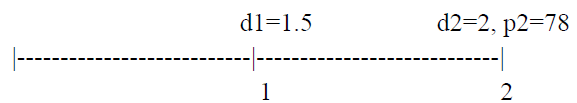

In [ ]:

pv1= npf.pv(rate=0.14, nper=1, pmt=0, fv=1.5)
pv2= npf.pv(rate=0.14, nper=2, pmt=0, fv=2+78)
pv1+pv2

-62.873191751308084

In [ ]:
pv1= npf.pv(rate=0.14, nper=1, pmt=0, fv=1.5)
pv2= npf.pv(rate=0.14, nper=2, pmt=0, fv=2)
pv1+pv2

-2.8547245306248072

**Stock price: the dividend discount model**

For an n-period model, we have n+1 future cash flows: n dividends plus one
selling price:
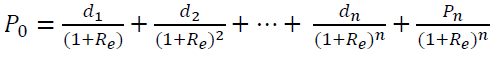

 The selling price at the end of the n-period is given here:

 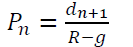

In [ ]:
def pvValueNperiodModel(r,longTermGrowthRate,dividendNplus1):
# Objective: estimate stock price based on an n-period model
# r: the rate of return
# LongTermGrowhRate: long term dividend growth rate
# dividendsNplus1 : a dividend vector n + 1 (n dividends with grammatical growth + 1 dividend with long-term growth rate)
  n = len(dividendNplus1)-1 # n=one period less than the year when the dividend enjoys a long-term growth rate
  # npf.npv() calculate the net present value of a cash flow series, exclude the last one.
  # Because the npf.npv() treats the first cash flow happening at time zero, we have to adjust the result by timing it by (1+r).
  npv = npf.npv(rate=r,values=dividendNplus1[:-1])*(1+r)
  sellingPrice = dividendNplus1[n]/(r-longTermGrowthRate) # The selling price at the end of the n period
  pv= npv + npf.pv(rate=r,nper=n,pmt=0,fv=-sellingPrice) #no coupon
  return pv

**Example**

Assume that a company had issued a $1.5 dividend last year. The dividend would enjoy grammatical growth in the next 5 years with growth rates of 20%, 15%, 10%, 9%, and 8%. After that, the growth rate would be reduced to a long-term growth rate of 4% forever. If the rate of return for such types of stocks is 18.2%, what is the stock price
today?

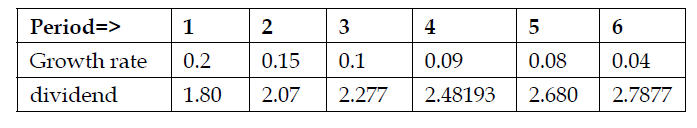

In [ ]:
#The first dividend of 1.8 is from 1.5*(1+0.2).
# for the n-period model, the n is one period less than the year when the dividend enjoys a long-term growth rate.
# For this case, we could choose 5.
r=0.182 # the rate of return
g=0.04  # long term dividend growth rate
d=[1.8,2.07,2.277,2.48193,2.68,2.7877] #dividends at year =1 - 5 and year 6 (with a long-term growth rate)
pvValueNperiodModel(r,g,d)

18.03215635454225